## Imports

In [6]:
import numpy as np

import sympy as sp
from sympy.utilities.lambdify import lambdify

import matplotlib.pyplot as plt
import time
from numba import njit

from sympy import init_printing
init_printing(use_latex=True)

## Numba accelerator

In [20]:
@njit(fastmath=True)
def solve_1d_burger(u, un, nt, nx, dt, dx, nu):
    
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx-1): 
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])+ nu * (dt / dx**2) * (un[i+1] -2*un[i] + un[i-1])  
    return 0

## Inputs

In [7]:
x, nu, t = sp.symbols('x nu t')

phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))

phiprime = phi.diff(x)

u = -2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t, x, nu), u)

###variable declarations
nx = 201
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

## Plot initial condition

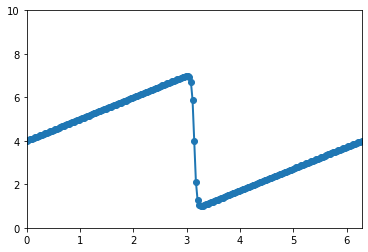

In [8]:
u = np.asarray([ufunc(t, x0, nu) for x0 in x])
plt.figure()
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

# Analytical solution
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

### Call the function to solve the burger equation

In [17]:
solve_1d_burger(u, un, nt, nx, dt, dx, nu)

### Plotting data
- Expected output:
    
![Burger](../data/Burger.png)

Text(0.5, 1.0, '1D Burger')

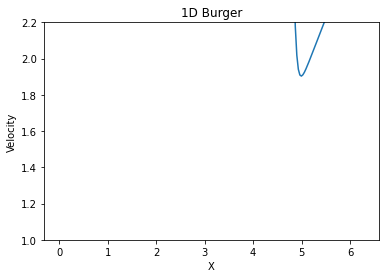

In [18]:
plt.plot(x,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Burger')

## Call Funtions using timeit

### Pure function

In [21]:
%timeit solve_1d_burger.py_func(u, un, nt, nx, dt, dx, nu)

190 ms ± 46.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [22]:
%timeit solve_1d_burger(u, un, nt, nx, dt, dx, nu)

149 µs ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
